# 2025 CITS4012 Individual Assignment

# Readme
*If there is something to be noted for the marker, please mention here.*

*If you are planning to implement a program with Object Oriented Programming style, please put those the bottom of this ipynb file*

In [ ]:
%pip install spacy
%pip install https://s3-us-west-2.amazonaws.com/ai2-s2-scispacy/releases/v0.5.4/en_core_sci_sm-0.5.4.tar.gz
%pip install scispacy
%pip install gensim
%pip install matplotlib

In [ ]:
import spacy
import scispacy
import csv
import gensim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import TSNE

# 1.Dataset Processing

In [ ]:
def read_data(fname):
    X = []
    y = []
    with open(fname, newline='\n') as csvfile:
        reader = csv.reader(csvfile, delimiter=",")
        next(reader) # skips first row (headers)
        for row in reader:
            X.append(row[1])
            y.append(int(row[0]))

    return X, y

train_X_raw, train_y = read_data("files/medical_tc_train.csv")
test_X_raw, test_y = read_data("files/medical_tc_test.csv")
_, labels = read_data("files/medical_tc_labels.csv") 
#labels contains a list of labels, where labels[i] corresponds to value i in train_y or test_y sets

In [ ]:
biomedical_nlp = spacy.load("en_core_sci_sm") #imports a biomedical scispaCy NLP model

def preprocess(X):
    preprocessed_X = []
    for p in biomedical_nlp.pipe(X, batch_size=32, n_process=4): #pipe is far faster than manual loop. Can potentially experiment with hyperparam values
        tokens=[
            token.lemma_.lower() #lemmatization, #case insensitivity
            for token in p
            if not token.is_stop and not token.is_punct #removal of stopwords and punctuation
        ]
        preprocessed_X.append(tokens)
    return preprocessed_X

train_X = preprocess(train_X_raw)
test_X = preprocess(test_X_raw)


# 2.Word Embedding Construction
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

In [ ]:
word2vec = gensim.models.Word2Vec(train_X)

bio_wordvec_file = "files/bio_embedding_extrinsic"
bio_wordvec = gensim.models.KeyedVectors.load_word2vec_format(bio_wordvec_file, binary=True)

In [ ]:
bio_wordvec_vectors= {}
for X_i in train_X:
    for token in X_i:
        if token in bio_wordvec.key_to_index:
            bio_wordvec_vectors[token] = bio_wordvec[token]
        #else:
            #print(token)
            # TODO
            # WHAT TO DO HERE? THIS IS MOSTLY NUMBERS, SYMBOLS AND UNITS

# 3.Visualization

In [91]:
def min_max_x_y(word2vec_transformed, biowordvec_transformed, buffer):
    all_points = np.vstack([word2vec_transformed, biowordvec_transformed])
    xmin, ymin = all_points.min(axis=0)
    xmax, ymax = all_points.max(axis=0)
    
    x_range = xmax - xmin
    y_range = ymax - ymin

    # Add [buffer]% gap on each side for aesthetic reasons only
    buffer_x = x_range * buffer
    buffer_y = y_range * buffer

    xmin = xmin - buffer_x
    xmax = xmax + buffer_x
    ymin = ymin - buffer_y
    ymax = ymax + buffer_y

    return xmin, xmax, ymin, ymax
    

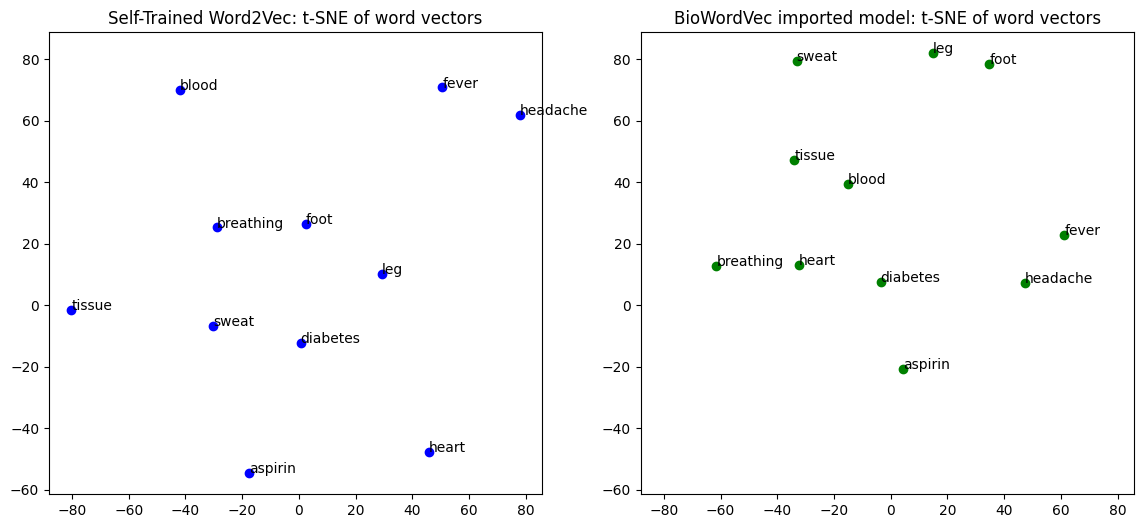

In [103]:
visualised_words = ["aspirin", "diabetes", "tissue", "blood", "heart", "breathing", "sweat", "headache", "fever", "leg", "foot"]

bio_wordvec_visualised_vecs = []
word2vec_visualised_vecs = []

for word in visualised_words:

    bio_wordvec_visualised_vecs.append(bio_wordvec[word])
    word2vec_visualised_vecs.append(word2vec.wv[word])

bio_wordvec_visualised_vecs = np.array(bio_wordvec_visualised_vecs)
word2vec_visualised_vecs = np.array(word2vec_visualised_vecs)

word2vec_transformed = TSNE(n_components=2, perplexity=5).fit_transform(word2vec_visualised_vecs)
biowordvec_transformed = TSNE(n_components=2, perplexity=5).fit_transform(bio_wordvec_visualised_vecs)

# These ensure both scales are the same
xmin, xmax, ymin, ymax = min_max_x_y(word2vec_transformed, biowordvec_transformed, 0.05)

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
axes[0].scatter(word2vec_transformed[:,0], word2vec_transformed[:,1], color='blue')

for i, word in enumerate(visualised_words):
    axes[0].annotate(word, (word2vec_transformed[i,0], word2vec_transformed[i,1]))
axes[0].set_title("Self-Trained Word2Vec: t-SNE of word vectors")
axes[0].set_xlim(xmin, xmax)
axes[0].set_ylim(ymin, ymax)

axes[1].scatter(biowordvec_transformed[:,0], biowordvec_transformed[:,1], color='green')

for i, word in enumerate(visualised_words):
    axes[1].annotate(word, (biowordvec_transformed[i,0], biowordvec_transformed[i,1]))
axes[1].set_title("BioWordVec imported model: t-SNE of word vectors")
axes[1].set_xlim(xmin, xmax)
axes[1].set_ylim(ymin, ymax)

plt.show()

# 3.2 Interpretation

TODO

# 4.RNN-based Model Implementation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

# 5.Performance Evaluation
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)

# 6.Interactive Inference Colab Form
(You can add as many code blocks and text blocks as you need. However, YOU SHOULD NOT MODIFY the section title)